# 2η Εργασία Τεχνικές Εξόρυξης Δεδομένων

**Στεβής Χαράλαμπος - Αντώνιος sdi1600278**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import datetime
import numpy as np

path_true = '/content/gdrive/MyDrive/TEDE_2/News _dataset/True.csv'
path_fake = '/content/gdrive/MyDrive/TEDE_2/News _dataset/Fake.csv'
df_True = pd.read_csv(path_true)
df_Fake = pd.read_csv(path_fake)

# 2. Μελέτη των δεδομένων

**α. Ο τίτλος καθορίζει αρκετά το περιεχόμενο ενός άρθρου. Προσπαθήστε να
οπτικοποιήστε τους τίτλους των fake και των non-fake news έτσι ώστε να μπορεί
κάποιος να εντοπίσει τα κεντρικά θέματα τα οποία διαπραγματεύονται τα άρθρα.**

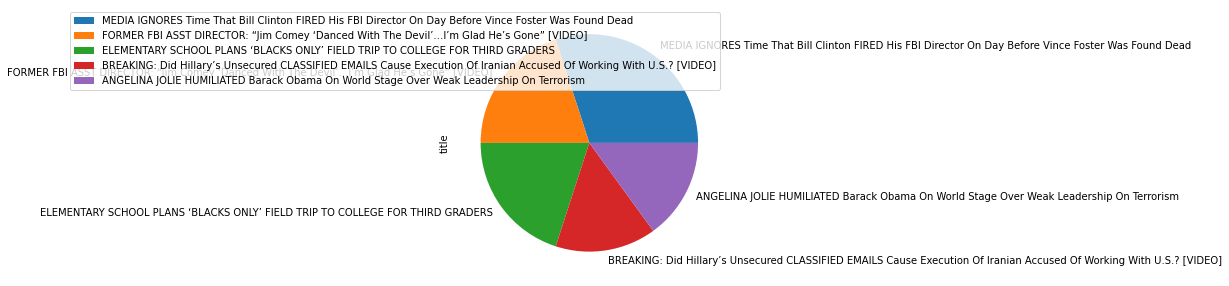

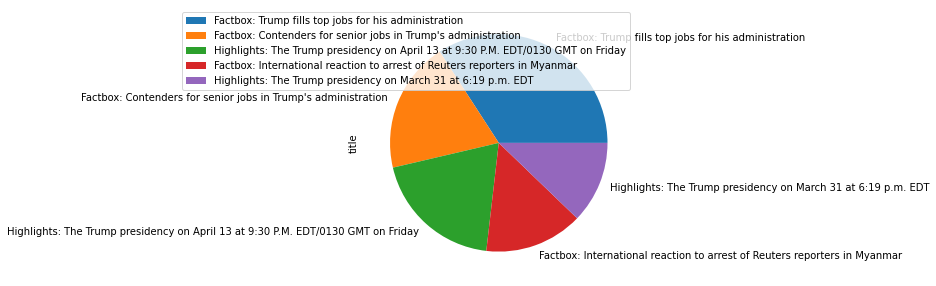

In [ ]:
#α. Ο τίτλος καθορίζει αρκετά το περιεχόμενο ενός άρθρου. Προσπαθήστε να
#οπτικοποιήστε τους τίτλους των fake και των non-fake news έτσι ώστε να μπορεί
#κάποιος να εντοπίσει τα κεντρικά θέματα τα οποία διαπραγματεύονται τα άρθρα.


res_fake = df_Fake['title'].value_counts().head(5)
res_fake= res_fake.to_frame()
plot = res_fake.plot.pie(y='title',figsize=(5,5))


res_true = df_True['title'].value_counts().head(5)
res_true = res_true.to_frame()

plot = res_true.plot.pie(y='title',figsize=(5,5))


**β. Σχεδιάστε γραφήματα που να δείχνουν το μέσο όρο των χαρακτήρων στα fake και
στα true news αντίστοιχα. Κάντε το ίδιο και για τη στήλη text.**

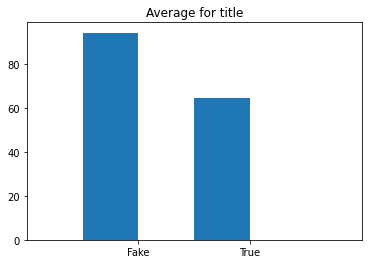

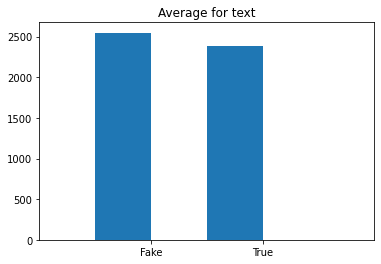

In [ ]:
#β. Σχεδιάστε γραφήματα που να δείχνουν το μέσο όρο των χαρακτήρων στα fake και
#στα true news αντίστοιχα. Κάντε το ίδιο και για τη στήλη text.
import matplotlib.pyplot as plt

#Gia titles
all_true = df_True['title'].str.len().sum()
len_true = len(df_True['title'])
average_true = all_true/len_true

all_fake = df_Fake['title'].str.len().sum()
len_fake = len(df_Fake['title'])
average_fake = all_fake/len_fake

categories = ["Fake", "True"]
values = [ average_fake,  average_true]
xs = np.arange(1, len(categories) + 1)
plt.bar(xs - 0.5/2, values, width=0.5)
plt.xticks(xs, categories)
plt.xlim(0, len(categories) + 1)
plt.title("Average for title")
plt.show()

#Gia text
all_true_text = df_True['text'].str.len().sum()
len_true_text = len(df_True['text'])
average_true_text = all_true_text/len_true_text

all_fake_text = df_Fake['text'].str.len().sum()
len_fake_text = len(df_Fake['text'])
average_fake_text = all_fake_text/len_fake_text


values_text = [ average_fake_text,  average_true_text]
xs_text = np.arange(1, len(categories) + 1)
plt.bar(xs_text - 0.5/2, values_text, width=0.5)
plt.xticks(xs_text, categories)
plt.xlim(0, len(categories) + 1)

plt.title("Average for text")
plt.show()



**γ. Σχεδιάστε την κατανομή του αριθμού των λέξεων για τη στήλη title και για τη στήλη
text (και για τα δύο αρχεία)**

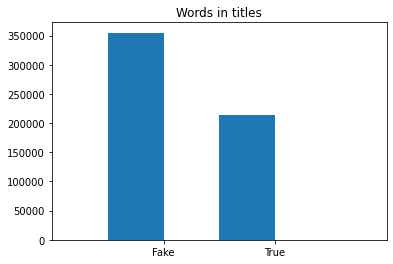

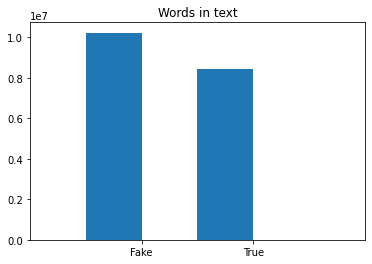

In [ ]:
#γ. Σχεδιάστε την κατανομή του αριθμού των λέξεων για τη στήλη title και για τη στήλη
#text (και για τα δύο αρχεία)

word_true_title = df_True['title'].apply(lambda x: len(str(x).split(' '))).sum()
word_fake_title  = df_Fake['title'].apply(lambda x: len(str(x).split(' '))).sum()

categories = ["Fake", "True"]

values = [ word_fake_title, word_true_title ]
xs = np.arange(1, len(categories) + 1)
plt.bar(xs - 0.5/2, values, width=0.5)
plt.xticks(xs, categories)
plt.xlim(0, len(categories) + 1)
plt.title("Words in titles")
plt.show()

word_true_text = df_True['text'].apply(lambda x: len(str(x).split(' '))).sum()
word_fake_text = df_Fake['text'].apply(lambda x: len(str(x).split(' '))).sum()


values_text = [ word_fake_text, word_true_text ]
xs_text = np.arange(1, len(categories) + 1)
plt.bar(xs_text - 0.5/2, values_text, width=0.5)
plt.xticks(xs_text, categories)
plt.xlim(0, len(categories) + 1)
plt.title("Words in text")
plt.show()


**δ. Επαναλλάβετε το προηγούμενο ερώτημα αφαιρώντας τα stopwords.**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


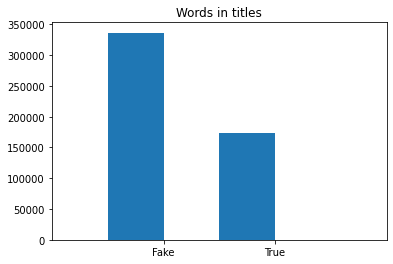

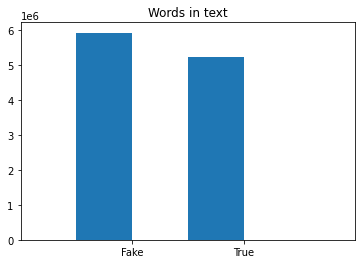

In [ ]:
#δ. Επαναλλάβετε το προηγούμενο ερώτημα αφαιρώντας τα stopwords.

import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop = stopwords.words('english')

df_True['tweet_without_stopwords_title'] = df_True['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_Fake['tweet_without_stopwords_title'] = df_Fake['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

df_True['tweet_without_stopwords_text'] = df_True['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df_Fake['tweet_without_stopwords_text'] = df_Fake['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

word_true_title = df_True['tweet_without_stopwords_title'].apply(lambda x: len(str(x).split(' '))).sum()
word_fake_title  = df_Fake['tweet_without_stopwords_title'].apply(lambda x: len(str(x).split(' '))).sum()

categories = ["Fake", "True"]

values = [ word_fake_title, word_true_title ]
xs = np.arange(1, len(categories) + 1)
plt.bar(xs - 0.5/2, values, width=0.5)
plt.xticks(xs, categories)
plt.xlim(0, len(categories) + 1)
plt.title("Words in titles")
plt.show()

word_true_text = df_True['tweet_without_stopwords_text'].apply(lambda x: len(str(x).split(' '))).sum()
word_fake_text = df_Fake['tweet_without_stopwords_text'].apply(lambda x: len(str(x).split(' '))).sum()


values_text = [ word_fake_text, word_true_text ]
xs_text = np.arange(1, len(categories) + 1)
plt.bar(xs_text - 0.5/2, values_text, width=0.5)
plt.xticks(xs_text, categories)
plt.xlim(0, len(categories) + 1)
plt.title("Words in text")
plt.show()

**ε. Ποιά είναι τα πιο συχνά (πχ 10 ή 20) bigrams στους τίτλους και ποιά στο κυρίως
άρθρο**


In [ ]:
#ε. Ποιά είναι τα πιο συχνά (πχ 10 ή 20) bigrams στους τίτλους και ποιά στο κυρίως
#άρθρο;


import collections
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

path_true = '/content/gdrive/MyDrive/TEDE_2/News _dataset/True.csv'
path_fake = '/content/gdrive/MyDrive/TEDE_2/News _dataset/Fake.csv'
df_True = pd.read_csv(path_true)
df_Fake = pd.read_csv(path_fake)

df_True['title'] = df_True['title'].str.replace('[^\w\s]','') 
df_Fake['title'] = df_Fake['title'].str.replace('[^\w\s]','') 
df_True['text'] = df_True['text'].str.replace('[^\w\s]','') 
df_Fake['text'] = df_Fake['text'].str.replace('[^\w\s]','') 

#True Titles
cnt_true_title = collections.Counter()
for title in df_True['title']:
  tokens_title_true = nltk.word_tokenize(title)
  cnt_true_title.update(nltk.bigrams(tokens_title_true))

print("For true Titles")
print(cnt_true_title.most_common(10))


#Fake Titles
cnt_fake_title = collections.Counter()
for title in df_Fake['title']:
  tokens_title_fake = nltk.word_tokenize(title)
  cnt_fake_title.update(nltk.bigrams(tokens_title_fake))

print("For fake Titles")
print(cnt_fake_title.most_common(10))

#True Text
cnt_true_text = collections.Counter()
for title in df_True['text'].head(8000):
  tokens_text_true = nltk.word_tokenize(title)
  cnt_true_text.update(nltk.bigrams(tokens_text_true))

print("For true Text")
print(cnt_true_text.most_common(10))

#Fake Text
cnt_fake_text = collections.Counter()
for title in df_Fake['text'].head(8000):
  tokens_text_fake = nltk.word_tokenize(title)
  cnt_fake_text.update(nltk.bigrams(tokens_text_fake))

print("For fake Text")
print(cnt_fake_text.most_common(10))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
For true Titles
[(('White', 'House'), 784), (('North', 'Korea'), 668), (('Trump', 'says'), 362), (('Trump', 'to'), 311), (('Islamic', 'State'), 229), (('Supreme', 'Court'), 227), (('says', 'he'), 186), (('to', 'meet'), 183), (('to', 'be'), 180), (('calls', 'for'), 174)]
For fake Titles
[(('Donald', 'Trump'), 611), (('White', 'House'), 290), (('President', 'Trump'), 285), (('Trump', 'Is'), 256), (('In', 'The'), 249), (('Hillary', 'Clinton'), 249), (('Of', 'The'), 230), (('To', 'Be'), 217), (('Fox', 'News'), 214), (('On', 'The'), 209)]
For true Text
[(('of', 'the'), 17413), (('in', 'the'), 14075), (('to', 'the'), 8630), (('on', 'the'), 6426), (('White', 'House'), 6055), (('United', 'States'), 5840), (('in', 'a'), 5788), (('for', 'the'), 5752), (('the', 'US'), 5727), (('the', 'United'), 5693)]
For fake Text
[(('of', 'the'), 15784), (('in', 'the'), 11254), (('Trump', 's'), 8980), 

# 3. Δημιουργία συνόλου εκμάθησης και δοκιμής

Σε ένα δικό σας ξεχωριστό αρχείο θα επιλέξετε ένα υποσύλο απο τα fake και ένα από τα
true, το οποίο θα το ονομάσετε train.csv και τα υπόλοιπα θα τα βάλετε σε άλλο αρχείο,
το test.csv. Το νέο αρχείο train πρέπει να έχει τις εξής στήλες: title, text, subject,date,
label. Η νέα στήλη label θα έχει την τιμή 1 αν το άρθρο προέρχεται από το true.csv και 0
αν προέρχεται απο το fake.csv. Αντίστοιχα θα φτιάξετε και το test.csv. Το train και το test
προσπαθήστε να έχουν ίδια ποσόστωση μεταξύ fake και true άρθρων.

In [ ]:
import pandas as pd
import datetime
import numpy as np

path_true = '/content/gdrive/MyDrive/TEDE_2/News _dataset/True.csv'
path_fake = '/content/gdrive/MyDrive/TEDE_2/News _dataset/Fake.csv'
df_True = pd.read_csv(path_true)
df_Fake = pd.read_csv(path_fake)

df_True['title'] = df_True['title'].str.replace('[^\w\s]','') 
df_True['text'] = df_True['text'].str.replace('[^\w\s]','') 
df_True['subject'] = df_True['subject'].str.replace('[^\w\s]','') 
df_True['date'] = df_True['date'].str.replace('[^\w\s]','') 

df_Fake['title'] = df_Fake['title'].str.replace('[^\w\s]','') 
df_Fake['text'] = df_Fake['text'].str.replace('[^\w\s]','') 
df_Fake['subject'] = df_Fake['subject'].str.replace('[^\w\s]','') 
df_Fake['date'] = df_Fake['date'].str.replace('[^\w\s]','') 

df_True['title'] = df_True['title'].str.lower()
df_True['text'] = df_True['text'].str.lower()
df_True['subject'] = df_True['subject'].str.lower()
df_True['date'] = df_True['date'].str.lower()

df_Fake['title'] = df_Fake['title'].str.lower()
df_Fake['text'] = df_Fake['text'].str.lower()
df_Fake['subject'] = df_Fake['subject'].str.lower()
df_Fake['date'] = df_Fake['date'].str.lower()


dftrain = df_Fake[:1000]
dftrain = dftrain.append(df_True[:1000], ignore_index = True)
dftrain['label'] = np.where((dftrain['subject'] == 'politicsnews') | (dftrain['subject'] == 'worldnews'), 1, 0)

dftest = df_Fake[1001:]
dftest = dftest.append(df_True[1001:], ignore_index = True)
dftest['label'] = np.where((dftest['subject'] == 'politicsnews') | (dftest['subject'] == 'worldnews'), 1, 0)

dftrain.to_csv(r'/content/gdrive/MyDrive/TEDE_2/News _dataset/train.csv')
dftest.to_csv(r'/content/gdrive/MyDrive/TEDE_2/News _dataset/test.csv')

# **2. Υλοποίηση Κατηγοριοποίησης (Classification)**

**BoW**

In [ ]:
#BoW gia count

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

bow_vectorizer = CountVectorizer(ngram_range=(1,1),max_df=0.95, min_df=0.1, max_features=500,stop_words='english') 

#transform
Count_data_train = bow_vectorizer.fit_transform(dftrain['text'])
Count_data_train = Count_data_train.toarray()

Count_data_test = bow_vectorizer.transform(dftest['text'])
Count_data_test = Count_data_test.toarray()


In [ ]:
#BoW gia tf idf
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 

#define tf-idf
tf_idf_vec = TfidfVectorizer(use_idf=True, smooth_idf=False,max_df=0.95, min_df=0.1, max_features=1000,stop_words='english')

#transform
tf_idf_train = tf_idf_vec.fit_transform(dftrain['text'])
tf_idf_train= tf_idf_train.toarray() 

tf_idf_test = tf_idf_vec.transform(dftest['text'])
tf_idf_test= tf_idf_test.toarray() 

**Logistic Regression**

In [ ]:
#Train gia aplo count
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

model = LogisticRegression()
model.fit(Count_data_train,dftrain['label'])

prediction_logistic = model.predict(Count_data_test)
#accuracy
accuracy_logistic = model.score(Count_data_test, dftest['label'])
print("accuracy = ", accuracy_logistic * 100, "%")

#f1
f1_logistic=f1_score(prediction_logistic,dftest['label'])
print("f1 = ", f1_logistic * 100 , "%")


accuracy =  91.73116374487131 %
f1 =  91.94358007586256 %


In [ ]:
#Train gia tf idf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

model = LogisticRegression()
model.fit(tf_idf_train,dftrain['label'])

prediction_logistic_tf = model.predict(tf_idf_test)
#accuracy
accuracy_logistic_tf = model.score(tf_idf_test, dftest['label'])
print("accuracy = ", accuracy_logistic_tf * 100, "%")

#f1
f1_logistic_tf=f1_score(prediction_logistic_tf,dftest['label'])
print("f1 = ", f1_logistic_tf * 100 , "%")

accuracy =  91.89201790376725 %
f1 =  92.01817597649975 %


**Naive Bayes**

In [ ]:
#Train gia aplo count
from sklearn.naive_bayes import GaussianNB
# instantiate
gnb = GaussianNB()
# fit
gnb.fit(Count_data_train,dftrain['label'])
# predict
prediction_naive = gnb.predict(Count_data_test)

#accuracy
accuracy_naive = gnb.score(Count_data_test, dftest['label'])
print("accuracy = ", accuracy_naive * 100, "%")

# f1 score
f1_naive = f1_score(prediction_naive,dftest['label'] )
print("f1 = ", f1_naive * 100 , "%")

accuracy =  86.5558560238717 %
f1 =  87.0894804002776 %


In [ ]:
#Train gia tf idf
from sklearn.naive_bayes import GaussianNB
# instantiate
gnb = GaussianNB()
# fit
gnb.fit(tf_idf_train,dftrain['label'])
# predict
prediction_naive_tf = gnb.predict(tf_idf_test)

#accuracy
accuracy_naive_tf = gnb.score(tf_idf_test, dftest['label'])
print("accuracy = ", accuracy_naive_tf * 100, "%")

# f1 score
f1_naive_tf = f1_score(prediction_naive_tf,dftest['label'] )
print("f1 = ", f1_naive_tf * 100 , "%")

accuracy =  87.90330100708691 %
f1 =  88.08960910781096 %


**Support Vector Machines**

In [ ]:
#Train gia aplo count
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = SVC()
#svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(Count_data_train,dftrain['label'])
GridSearchCV(estimator=SVC(),param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

prediction_svc = clf.predict(Count_data_test)

#accuracy
accuracy_svc =clf.score(Count_data_test, dftest['label'])
print("accuracy = ", accuracy_svc * 100, "%")

# f1 score
f1_svc = f1_score(prediction_svc,dftest['label'] )
print("f1 = ", f1_svc * 100 , "%")

accuracy =  95.40516598284222 %
f1 =  95.35546810566252 %


In [ ]:
#Train gia tf idf
from sklearn import svm, datasets
from sklearn.svm import SVC
svc = SVC()
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(tf_idf_train,dftrain['label'])
GridSearchCV(estimator=SVC(),param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

prediction_svc_tf = clf.predict(tf_idf_test)

#accuracy
accuracy_svc_tf =clf.score(tf_idf_test, dftest['label'])
print("accuracy = ", accuracy_svc_tf * 100, "%")

# f1 score
f1_svc_tf = f1_score(prediction_svc_tf,dftest['label'] )
print("f1 = ", f1_svc_tf * 100 , "%")

accuracy =  93.30007459903021 %
f1 =  93.35890562898605 %


**Random Forests**

In [ ]:
#Train gia tf idf
from sklearn.ensemble import RandomForestClassifier

# instantiate
rf = RandomForestClassifier()
# fit
rf.fit(Count_data_train,dftrain['label'])
# predict
prediction_rf = rf.predict(Count_data_test)

#accuracy
accuracy_rf = rf.score(Count_data_test, dftest['label'])
print("accuracy = ", accuracy_rf * 100, "%")

# f1 score
f1_rf = f1_score(prediction_rf,dftest['label'] )
print("f1 = ", f1_rf * 100 , "%")

accuracy =  99.13744871316673 %
f1 =  99.0965032232858 %


In [ ]:
#Train gia aplo count
from sklearn.ensemble import RandomForestClassifier

# instantiate
rf = RandomForestClassifier()
# fit
rf.fit(tf_idf_train,dftrain['label'])
# predict
prediction_rf_tf = rf.predict(tf_idf_test)

#accuracy
accuracy_rf_tf = rf.score(tf_idf_test, dftest['label'])
print("accuracy = ", accuracy_rf_tf * 100, "%")

# f1 score
f1_rf_tf = f1_score(prediction_rf_tf,dftest['label'] )
print("f1 = ", f1_rf_tf * 100 , "%")

accuracy =  99.30529653114509 %
f1 =  99.27164295840055 %


**Word2Vec**


In [ ]:
!pip install --upgrade gensim

Requirement already up-to-date: gensim in /usr/local/lib/python3.7/dist-packages (4.0.1)


In [ ]:
import gensim.downloader as api

# download the pretrained embeddings
glove_vectors = api.load("glove-wiki-gigaword-100")


In [ ]:
def get_mean_vector(word2vec_model, words):
    # remove out-of-vocabulary words
    words = [word for word in words if word in word2vec_model]
    if len(words) >= 1:
        return np.mean(word2vec_model[words], axis=0)
    else:
        return []

In [ ]:
from gensim.models import Word2Vec

sentences = dftrain['text'].tolist()
count=0
arrayTrain = []

for sent in sentences:
  
  tokens = []
  singleWord = str(sent).lower().split()
  
  for sin in singleWord:
    tokens.append(sin)

  vec = get_mean_vector(glove_vectors, tokens)
  if len(vec) == 0:
    dftrain = dftrain.drop(dftrain.index[count])
    continue
  count = count +1
  arrayTrain.append(vec)


In [ ]:
from gensim.models import Word2Vec

sentences = dftest['text'].tolist()
count=0
arrayTest = []

for sent in sentences:
  
  tokens = []
  singleWord = str(sent).lower().split()
  
  for sin in singleWord:
    tokens.append(sin)

  vec = get_mean_vector(glove_vectors, tokens)
  if len(vec) == 0:
    dftest= dftest.drop(dftest.index[count])
    continue
  count = count + 1
  arrayTest.append(vec)


**Logistic Regression**

In [ ]:
#Train gia w2v
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

model_2 = LogisticRegression()
model_2.fit(arrayTrain,dftrain['label'])

prediction_logistic_2 = model_2.predict(arrayTest)
#accuracy
accuracy_logistic_2 = model_2.score(arrayTest, dftest['label'])
print("accuracy = ", accuracy_logistic_2 * 100, "%")

#f1
f1_logistic_2=f1_score(prediction_logistic_2,dftest['label'])
print("f1 = ", f1_logistic_2 * 100 , "%")

accuracy =  89.16073968705548 %
f1 =  89.40685820203892 %


**Naive Bayes**

In [ ]:
#Train gia w2v
from sklearn.naive_bayes import GaussianNB
# instantiate
gnb_2 = GaussianNB()
# fit
gnb_2.fit(arrayTrain,dftrain['label'])
# predict
prediction_naive_2 = gnb_2.predict(arrayTest)

#accuracy
accuracy_naive_2 = gnb_2.score(arrayTest, dftest['label'])
print("accuracy = ", accuracy_naive_2 * 100, "%")

# f1 score
f1_naive_2 = f1_score(prediction_naive_2,dftest['label'] )
print("f1 = ", f1_naive_2 * 100 , "%")

accuracy =  82.27833096254149 %
f1 =  83.77785976258166 %


**Support Vector Machines**

In [ ]:
#Train gia w2v
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc_2 = SVC()
#svc = svm.SVC()
clf_2 = GridSearchCV(svc_2, parameters)
clf_2.fit(arrayTrain,dftrain['label'])
GridSearchCV(estimator=SVC(),param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

prediction_svc_2 = clf_2.predict(arrayTest)

#accuracy
accuracy_svc_2 =clf_2.score(arrayTest, dftest['label'])
print("accuracy = ", accuracy_svc_2 * 100, "%")

# f1 score
f1_svc_2 = f1_score(prediction_svc_2,dftest['label'] )
print("f1 = ", f1_svc_2 * 100 , "%")

accuracy =  91.34423897581793 %
f1 =  91.44463971880491 %


**Random Forests**

In [ ]:
#Train gia w2v
from sklearn.ensemble import RandomForestClassifier

# instantiate
rf_2 = RandomForestClassifier()
# fit
rf_2.fit(arrayTrain,dftrain['label'])
# predict
prediction_rf_2 = rf_2.predict(arrayTest)

#accuracy
accuracy_rf_2 = rf_2.score(arrayTest, dftest['label'])
print("accuracy = ", accuracy_rf_2 * 100, "%")

# f1 score
f1_rf_2 = f1_score(prediction_rf_2,dftest['label'] )
print("f1 = ", f1_rf_2 * 100 , "%")

accuracy =  86.8018018018018 %
f1 =  87.31168091168091 %
